## ÌîÑÎ°úÏ†ùÌä∏ ÏöîÏïΩ
1. ÌîÑÎ°úÏ†ùÌä∏ : Data Labeling
2. ÌîÑÎ°úÏ†ùÌä∏ : Feature Engineering
3. ÌîÑÎ°úÏ†ùÌä∏ : Model Traning

## __1. ÌîÑÎ°úÏ†ùÌä∏ : Data Labeling__
ÏúÑÏóêÏÑú Î∞∞Ïö¥ Data Labeling 4Í∞ÄÏßÄÎ•º ÏßÅÏ†ë Ï†ÅÏö©Ìï¥Î¥ÖÏãúÎã§.  

‚ë† __Price Change Direction__ Ï†ÅÏö©ÌïòÍ∏∞  
‚ë° __Using Moving Average__ Ï†ÅÏö©ÌïòÍ∏∞  
‚ë¢ __Local Min-Max__ Ï†ÅÏö©ÌïòÍ∏∞  
‚ë£ __Trend Scanning__ Ï†ÅÏö©ÌïòÍ∏∞  

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Ìå®ÌÇ§ÏßÄ ÌôïÏù∏ ÌõÑ Ïã§Ìñâ
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='time'>

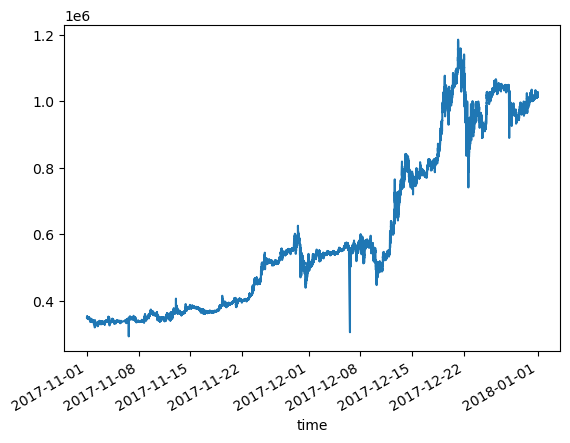

In [3]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
modify_data = pd.read_csv(('sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)

# Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

### __‚ë† Price Change Direction Ï†ÅÏö©ÌïòÍ∏∞__  
ÏïÑÎûòÏùò ÏàòÏãùÏùÑ Ï†ÅÏö©ÌïòÏó¨ momentum_signalÏùÑ ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§. Í∑∏Î¶¨Í≥† Í∏∞Ï°¥Ïùò Îç∞Ïù¥ÌÑ∞(modify_data)ÏôÄ ÏàòÏãùÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞(momentum_signal)Î•º ÏãúÍ∞ÅÌôîÌïòÏó¨ Ïñ¥Îñ§ Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÎπÑÍµêÌï¥Î¥ÖÏãúÎã§.
$$i(t) = \begin{cases} 1, & \text{if } \text{price}_t - \text{price}_{t-n} > 0 \\0, & \text{otherwise}\end{cases}$$  
Î®ºÏ†Ä windowÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§. Î≥¥ÌÜµ windowÎäî ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïù¥Ï†Ñ ÏãúÏ†êÍ≥º ÌòÑÏû¨ ÏãúÏ†êÍ∞ÑÏùò Í∞ÑÍ≤©ÏùÑ Íµ¨Í∞ÑÎ≥ÑÎ°ú ÏûòÎùºÏÑú ÏÇ¨Ïö©ÌïòÍ≥§ Ìï©ÎãàÎã§. Ïù¥Î†áÍ≤å ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†Îäî Ï†ïÌôïÌïú ÏòàÏ∏°ÏùÑ Îã¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ Ïö∞Î¶¨Í∞Ä Í∞ÄÏßÄÍ≥† ÏûàÎäî Ï†ïÎ≥¥Î•º Í≥ºÍ±∞Î°úÎ∂ÄÌÑ∞ Ï£ºÏñ¥ÏßÑ ÏãúÏ†êÏóêÏÑú Í∞ÄÎä•Ìïú ÏïàÏ†ÑÌïòÍ≤å Î≥¥Ï°¥Îêú Ï†ïÎ≥¥Î•º Î™®Îç∏Ïóê Ï†úÍ≥µÌïòÍ∏∞ ÏúÑÌï¥ WindowÎ°ú Îã§Ïãú Íµ¨ÏÑ±Ìïú Îã§Ïùå Î™®Îç∏Ïóê inputÏúºÎ°ú Ï£ºÏûÖÌïòÎäî Í≤ÉÏûÖÎãàÎã§. windowÎäî Î≥¥ÌÜµ time series data Ïô∏ÏóêÎèÑ ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÎäî Í∏∞Î≤ïÏûÖÎãàÎã§.(ex. Ï†ïÎ†¨ ÏïåÍ≥†Î¶¨Ï¶ò, CNNÏùò sliding Îì±...)
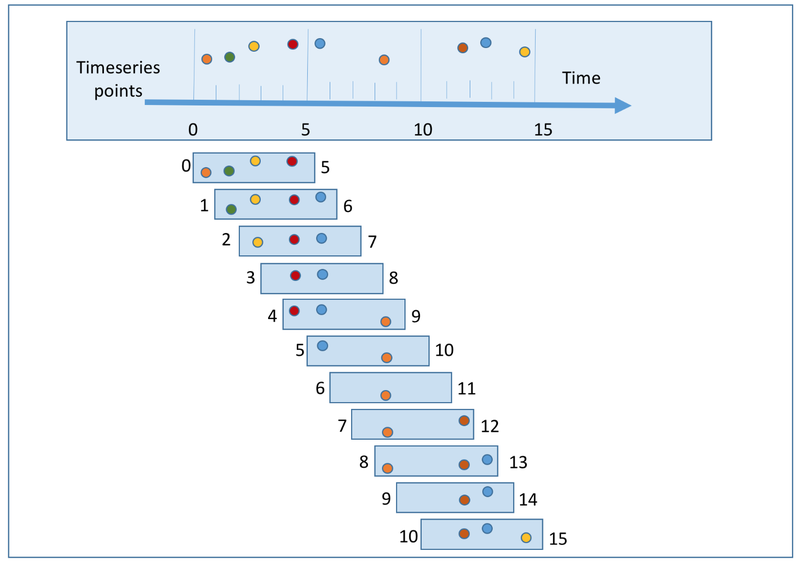
[https://docs.wavefront.com/query_language_windows_trends.html]


In [5]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# window ÏßÄÏ†ï
window = 10 # ÏïûÏÑú ÏÇ¨Ïö©Ìïú windowÏùò Í∞íÏùÄ 10ÏûÖÎãàÎã§.

# momentum_signal ÎßåÎì§Í∏∞
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1) # modify_data['close'].shift(window)ÌôúÏö©

# s_momentum_signal ÎßåÎì§Í∏∞
s_momentum_signal = pd.Series(momentum_signal, index = modify_data.index) # Îç∞Ïù¥ÌÑ∞ ÌôúÏö©ÏùÑ ÏúÑÌï¥ pd.SeriesÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.

Í∏∞Ï°¥Ïùò Îç∞Ïù¥ÌÑ∞(modify_data)ÏóêÏÑú ÌïÑÏöîÌïú close(Ï¢ÖÍ∞Ä)Î•º Í∞ÄÏ†∏Ïò§Í≥† ÏàòÏãùÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞(s_momentum_signal)Ïùò Ï¢ÖÍ∞ÄÏôÄ ÏñºÎßàÎÇò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

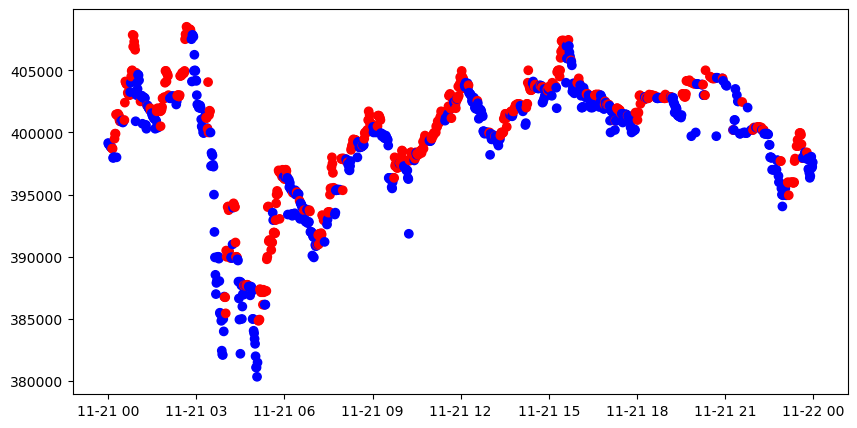

In [6]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
sub_data = modify_data.loc['2017-11-21', 'close'] # locÎ•º ÌôúÏö©ÌïòÏó¨ 2017-11-21Î∂ÄÌÑ∞ close(Ï¢ÖÍ∞Ä)ÍπåÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞

# ÏàòÏãù Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
c_sig = s_momentum_signal.loc['2017-11-21'] # locÎ•º ÌôúÏö©ÌïòÏó¨ 2017-11-21Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞íÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞

# Îëê Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÍµêÎ•º ÏúÑÌïú ÏÉâÏÉÅ Î∞îÍæ∏Í∏∞
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue') # np.where ÏÇ¨Ïö©

# ÏãúÍ∞ÅÌôîÌïòÍ∏∞
plt.figure(figsize = (10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

### __‚ë° Using Moving Average Ï†ÅÏö©ÌïòÍ∏∞__  
ÏïûÏÑú ÏÇ¨Ïö©ÌñàÎçò Ïù¥ÎèôÌèâÍ∑†ÏÑ†ÏùÑ Ïù¥Ïö©Ìïú Î∞©ÏãùÏùÑ Ï†ÅÏö©Ìï¥Î¥ÖÏãúÎã§. ÏàòÏãùÏùÄ ÏïÑÎûòÍ≥º Í∞ôÏäµÎãàÎã§.
$$i(t) = \begin{cases} 1, & \text{if price}_t > \text{MA}(t \ldots t-n) \\0, & \text{otherwise}\end{cases}$$

In [7]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# momentum_signal 
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1) # modify_data['close'].rolling(window).mean() ÌôúÏö©

# s_momentum_signal
s_momentum_signal = pd.Series(momentum_signal, index = modify_data.index) # pd.SeriesÎ°ú Î≥ÄÌôò

ÏïûÏÑú "‚ë† Price Change Direction Ï†ÅÏö©ÌïòÍ∏∞"ÏóêÏÑú ÏßÑÌñâÌñàÎçò Í≤ÉÏ≤òÎüº ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Using Moving Average ÏàòÏãùÏùÑ Ï†ÅÏö©Ìïú Í≤ÉÍ≥º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÏó¨ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÌôïÏù∏Ìï©ÎãàÎã§.

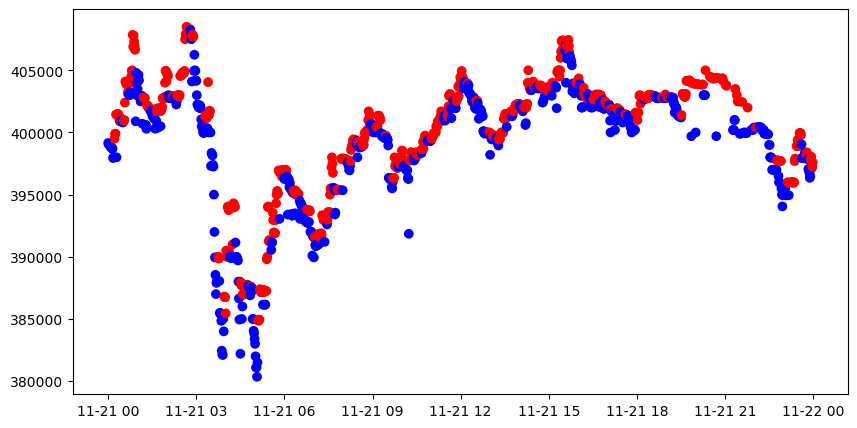

In [8]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
sub_data = modify_data.loc['2017-11-21', 'close']

# ÏàòÏãù Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
c_sig = s_momentum_signal.loc['2017-11-21']

# Îëê Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÍµêÎ•º ÏúÑÌïú ÏÉâÏÉÅ Î∞îÍæ∏Í∏∞
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# ÏãúÍ∞ÅÌôîÌïòÍ∏∞
plt.figure(figsize = (10, 5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

### __‚ë¢ Local Min-Max Ï†ÅÏö©ÌïòÍ∏∞__  
ÏµúÏÜå - ÏµúÎåÄ Íµ¨Í∞ÑÏùÑ Ïù¥Ïñ¥ÎÇòÍ∞ÄÎ©∞ LabelingÌïòÎäî Ìï®ÏàòÎ•º ÏïÑÎûò ÏàòÎèÑÏΩîÎìú(pseudo-code)Î•º Î≥¥Í≥† ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§.

ùêºùëõùëñùë°ùëñùëéùëôùëñùëßùëí ùë£ùëéùëüùëñùëéùëèùëôùëíùë†ùëìùëúùëü ùëñ ùëñùëõ ùëëùëéùë°ùëéùë†ùëíùë°:  
    ùëñùëì ùëêùë¢ùëüùëüùëíùëõùë°ùëùùëüùëñùëêùëí<ùëùùëüùëíùë£ùëñùëúùë¢ùë†ùëöùëñùëõùëùùëüùëñùëêùëí  
        ùëöùëñùëõùëùùëüùëñùëêùëí‚Üêùëêùë¢ùëüùëüùëíùëõùë°ùëùùëüùëñùëêùëí  
        ùëùùëéùë†ùë†ùëñùëõùëî ùë°‚Ñéùëüùëúùë¢ùëî‚Ñé ùë°‚Ñéùëí ùêπùëéùëôùëôùëñùëõùëî ùëáùëüùëíùëõùëë  
        ùëéùëêùëêùë¢ùëöùë¢ùëôùëéùë°ùëíùë†ùëöùëñùëõùëùùëüùëñùëêùëí  
    ùëñùëì ùëêùë¢ùëüùëüùëíùëõùë°ùëùùëüùëñùëêùëí>ùëùùëüùëíùë£ùëñùëúùë¢ùë†ùëöùëéùë•ùëùùëüùëñùëêùëí  
        ùëöùëéùë•ùëùùëüùëñùëêùëí‚Üêùëêùë¢ùëüùëüùëíùëõùë°ùëùùëüùëñùëêùëí  
        ùëùùëéùë†ùë†ùëñùëõùëî ùë°‚Ñéùëüùëúùë¢ùëî‚Ñé ùë°‚Ñéùëí ùëÖùëñùë†ùëñùëõùëî ùëáùëüùëíùëõùëë  
        ùëéùëêùëêùë¢ùëöùë¢ùëôùëéùë°ùëíùë†ùëöùëéùë•ùëùùëüùëñùëêùëí  
    ùëñùëì ùëíùëõùëëùë† ùë°‚Ñéùëí ùêπùëéùëôùëôùëñùëõùëî ùëáùëüùëíùëõùëë  
        ùëöùëéùë•ùëùùëüùëñùëêùëí‚Üêùëöùëñùëõùëùùëüùëñùëêùëí  
    ùëñùëì ùëíùëõùëëùë† ùë°‚Ñéùëí ùëÖùëñùë†ùëñùëõùëî ùëáùëüùëíùëõùëë  
        ùëöùëñùëõùëùùëüùëñùëêùëí‚Üêùëöùëéùë•ùëùùëüùëñùëêùëí  

‚ë†~‚ë¶ÍπåÏßÄ ÏΩîÎìúÎ•º ÏûêÏÑ∏Ìûà Îì§Ïó¨Îã§Î≥¥Í≥† Ïñ¥Îñ†Ìïú Î∞©ÏãùÏúºÎ°ú ÏΩîÎìúÍ∞Ä ÎèôÏûëÎêòÎäîÏßÄ ÎúØÏñ¥Î¥ÖÏãúÎã§.  
‚ëß return Í∞íÏùÄ dictionary ÌòïÌÉúÎ°ú 2Í∞úÏùò DataFrameÏù¥ Î∞òÌôòÎêòÏñ¥ÏïºÌï©ÎãàÎã§.

In [10]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Local min / max Î•º Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    max_value = close.iloc[0] # ‚ë†
    n_cnt_min, n_cnt_max = 0, 0
    
    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False
    
    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            max_value = val # ‚ë°
            maxes.append(max_value)  # ‚ë¢
            max_idxes.append(idx)
            n_cnt_max = 0
            b_max_update = True # ‚ë£
        
        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0
    
        if not b_min_update:
            b_max_update = False # ‚ë§
            # [[YOUR CODE]] # ‚ë•
            if n_cnt_max >= wait:
                min_value = max_value # ‚ë¶
                n_cnt_max = 0
               
    return pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes}) # ‚ëß

get_local_min_max Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ return Í∞íÏù¥ 2Í∞úÍ∞Ä ÎÇòÏò§Í≤å Îê©ÎãàÎã§. ÏïÑÎûò Ï£ºÏÑùÏùÑ Ï†úÍ±∞ÌïòÏó¨ minÍ≥º maxesÏùò Í∞íÏù¥ Ïñ¥ÎñªÍ≤å ÎÇòÏò§ÎäîÏßÄ ÌôïÏù∏Ìï¥Î¥ÖÏãúÎã§.

In [11]:
# Local mins, maxesÎ•º ÌôïÏù∏
mins, maxes = get_local_min_max(sub_data, wait=3)

# mins, maxes ÌôïÏù∏ 
print(mins)
print('--'*20)
print(maxes)

              min_time  local_min
0  2017-11-21 00:01:00     399050
1  2017-11-21 00:03:00     399000
2  2017-11-21 00:04:00     398900
3  2017-11-21 00:05:00     398850
4  2017-11-21 00:06:00     398800
5  2017-11-21 00:08:00     398700
6  2017-11-21 00:10:00     397950
7  2017-11-21 03:30:00     397300
8  2017-11-21 03:35:00     397250
9  2017-11-21 03:36:00     395000
10 2017-11-21 03:37:00     392000
11 2017-11-21 03:38:00     389950
12 2017-11-21 03:39:00     388550
13 2017-11-21 03:40:00     387000
14 2017-11-21 03:48:00     385500
15 2017-11-21 03:49:00     385400
16 2017-11-21 03:51:00     384850
17 2017-11-21 03:52:00     382450
18 2017-11-21 03:53:00     382150
19 2017-11-21 03:54:00     382100
20 2017-11-21 05:01:00     382000
21 2017-11-21 05:02:00     381100
22 2017-11-21 05:04:00     380350
----------------------------------------
               max_time  local_max
0   2017-11-21 00:13:00     399500
1   2017-11-21 00:14:00     399900
2   2017-11-21 00:16:00     401450
3  

(376546.5, 412585.0)

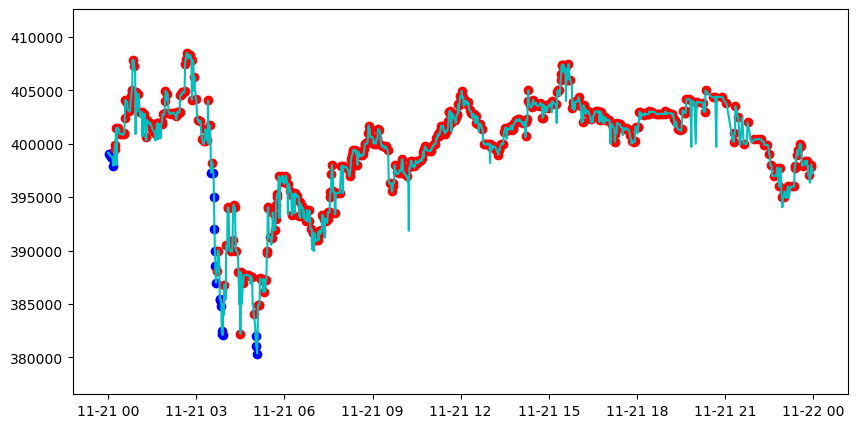

In [12]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# subplots Î∞è plot ÏÉùÏÑ±
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.plot(sub_data, 'c')

# min_time, local_minÏùÑ ÌôúÏö©Ìïú scatter plot ÏÉùÏÑ±
ax.scatter(mins.min_time, mins.local_min, c = 'blue')

# maxes_time, local_maxÎ•º ÌôúÏö©Ìïú scatter plot ÏÉùÏÑ±
ax.scatter(maxes.max_time, maxes.local_max, c = 'red')

# yÏ∂ï ÏÑ§Ï†ï
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

### __‚ë£ Trend Scanning Ï†ÅÏö©ÌïòÍ∏∞__
Trend ScanningÏùÑ Íµ¨ÌòÑÌï¥Î¥ÖÏãúÎã§.
$$x_{t+l} = \beta_0 + \beta_1 * l + \epsilon_{t+l}$$
$$\hat{\beta}_1 = \frac{\sigma}{\sqrt{\beta_1}}$$
$$i(t) = \begin{cases}1, & \text{if } \max(\hat{\beta}_1) > 0 \\0, & \text{otherwise}\end{cases}$$

OLSÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌïòÎäî Í≤ΩÏö∞ Ïú†Ïö©ÌïòÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏúºÎ©∞ ÏïÑÎûò Ìï®ÏàòÏóêÏÑú ols.tvalueÎ•º ÌÜµÌï¥ t-valueÍ∞íÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ìï®ÏàòÎ•º ÌôúÏö©ÌïòÏó¨ Ï∂îÏÑ∏(trend)Î•º Ï∂îÏ†ïÌï©ÎãàÎã§.

In [13]:
def t_val_lin_r(close):
    import statsmodels.api as sml
    
    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit() 
    return ols.tvalues[1]

In [14]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [15]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Ïù¥ ÏΩîÎìú Î∏îÎü≠ÏùÄ Ïã§ÌñâÏóê 20-30Î∂ÑÏ†ïÎèÑÍ∞Ä ÏÜåÏöîÎê† Ïàò ÏûàÏäµÎãàÎã§.

molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # Ï†ÑÎ∞© ÌÉêÏÉâÏùÑ ÏúÑÌïú ÏÉòÌîå Ï∂îÏ∂ú
    if look_forward_window > subset.shape[0]:
        continue
    
    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌï¥ t ÌÜµÍ≥ÑÎüâÍ∞íÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ï∂îÏÑ∏ Ï∂îÏ†ï
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        tval.append(t_val_lin_r(df.values))  # t-value ÏÇ¨Ïö©
    
    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

label.loc[molecule] = np.array(tmp_out)  # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 33384/33384 [23:12<00:00, 23.97it/s]  


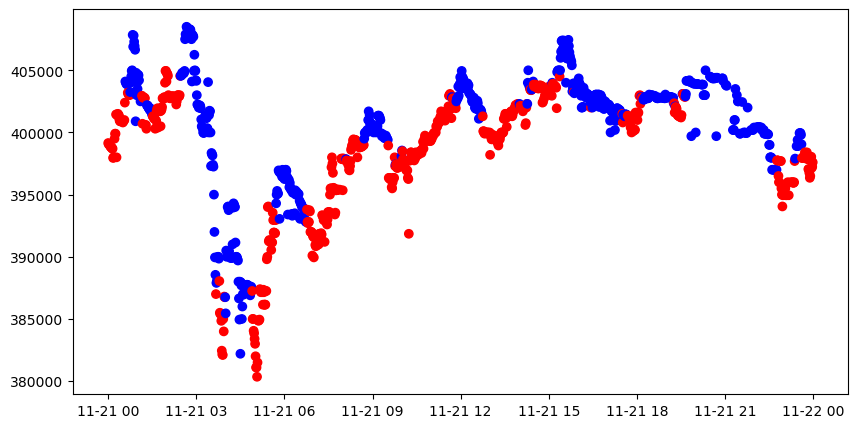

In [16]:
# ÏãúÍ∞ÅÌôî
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values, c=c_sig['color'])

## __2. ÌîÑÎ°úÏ†ùÌä∏ : Feature Engineering__
‚ë† ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞  
‚ë° Technical Index Ï†ÅÏö©ÌïòÍ∏∞  
‚ë¢ Feature Selection methods Ï†ÅÏö©ÌïòÍ∏∞

### __‚ë† ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞__  
ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [17]:
# !pip install ta==0.9.0
# !pip install shap

In [18]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

import sys
sys.path.append('/aiffel/aiffel/fnguide/data/')
from libs.feature_importance import importance as imp
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [19]:
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï
DATA_PATH = '.'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

# ÌïôÏäµ ÏãúÍ∞Ñ Îã®Ï∂ïÏùÑ ÏúÑÌï¥ Ïó¨Í∏∞ÏÑ† Ìé∏ÏùòÏÉÅ 1000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]

#### __‚ë° Technical Index Ï†ÅÏö©ÌïòÍ∏∞__  
ÏïûÏÑú Î∞∞Ïö¥ Í∏∞Ïà†Ï†Å ÏßÄÌëúÏôÄ ÏàòÏùµÎ•†/Î≥ÄÎèôÏÑ± ÏßÄÌëúÎ•º Ï∞∏Í≥†ÌïòÏó¨ ÏΩîÎìúÎ•º ÎúØÏñ¥Î¥ÖÏãúÎã§.

In [20]:
# Í∏∞Ïà†Ï†Å ÏßÄÌëúÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.

mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(close=df_[close], window=20, fillna=fillna).aroon_indicator()

## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

In [21]:
# ÏàòÏùµÎ•† / Î≥ÄÎèôÏÑ± ÏßÄÌëúÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

In [22]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

df_tmp_data = df_.join(df_label_data).dropna()

# X, y Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞
X = df_tmp_data.iloc[:, 5:-1] 
y = df_tmp_data.iloc[:, -1] # iloc[:, -1] ÏÇ¨Ïö©

# StandardScaler Ï†ÅÏö©
sc = StandardScaler()

# fit_transform ÏÇ¨Ïö©
X_sc = sc.fit_transform(X)

# DataFrame Î≥ÄÌôò
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [23]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# RandomForest Î™®Îç∏ Ï†ÅÏö©
rfc = RandomForestClassifier(class_weight = 'balanced')

# RandomForest fit ÌïòÍ∏∞
rfc.fit(X_sc, y)

RandomForestClassifier(class_weight='balanced')

#### __‚ë¢ Feature Selection methods Ï†ÅÏö©ÌïòÍ∏∞__
__MDI, Mean Decrease Impurity__

In [24]:
# MDI, Mean Decrease Impurity 
feat_imp = imp.mean_decrease_impurity(rfc, X.columns)
feat_imp

mean       std
volume_cmf        0.052361  0.002210
volume_fi         0.040508  0.002109
volume_mfi        0.043597  0.002221
volume_sma_em     0.037573  0.001714
volume_vpt        0.025902  0.001801
volatility_atr    0.077540  0.003587
volatility_ui     0.045796  0.002137
trend_macd_diff   0.078336  0.003298
trend_adx         0.054259  0.002381
trend_trix        0.064867  0.002613
trend_mass_index  0.068074  0.002711
trend_dpo         0.024431  0.001535
trend_aroon_ind   0.033959  0.001737
momentum_rsi      0.037990  0.002245
momentum_wr       0.030234  0.001897
vol_change_5      0.016747  0.001063
ret_5             0.031590  0.001940
vol_change_10     0.015843  0.000962
ret_10            0.044180  0.002913
vol_change_20     0.016558  0.000974
ret_20            0.041122  0.002435
std_30            0.049540  0.002169
vol_std_30        0.068996  0.003195

__MDA, Mean Decrease Accuracy__

In [25]:
# MDA, Mean Decrease Accuracy
svc_rbf = SVC(kernel='rbf', probability=True) # Tree Î∞è Support Vector Machine Ïô∏Ïóê Îã§Î•∏ Î∂ÑÎ•òÍ∏∞(classifier)Î•º ÏÇ¨Ïö©Ìï¥Î¥ÖÏãúÎã§.
cv = KFold(n_splits=5) # n_splitsÏùÑ Î≥ÄÍ≤ΩÌï¥Î¥ÖÏãúÎã§.
feat_imp_mda = imp.mean_decrease_accuracy(svc_rbf, X_sc, y, cv_gen=cv)

In [26]:
# plot_feature_importance Ìï®Ïàò ÎßåÎì§Í∏∞
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path) 
    else:
        plt.show()

plot_feature_importance Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ feat_impÏôÄ feat_imp_mdaÎ•º ÌôïÏù∏Ìï¥Î¥ÖÏãúÎã§.

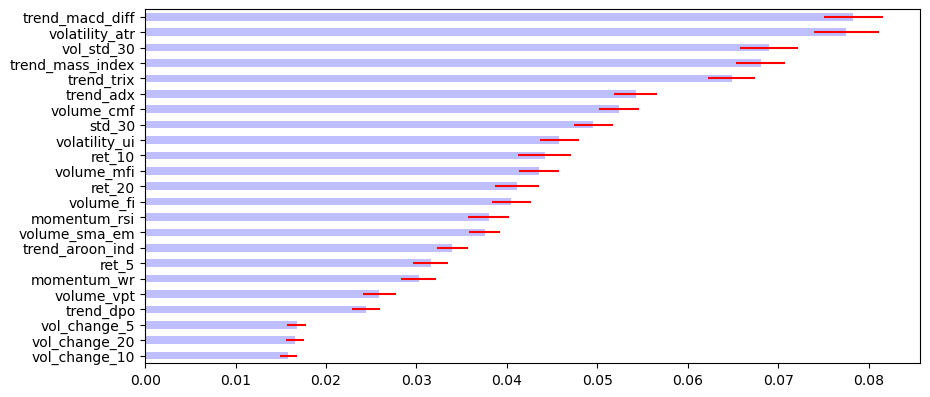

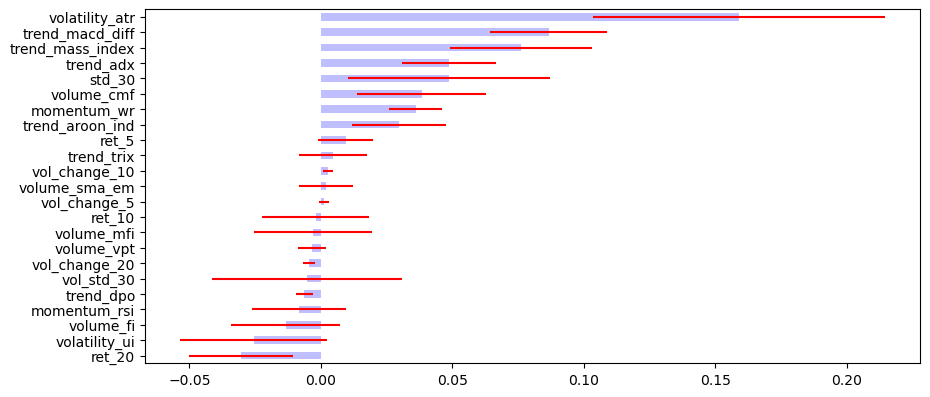

In [27]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# feat_imp ÌôïÏù∏
plot_feature_importance(feat_imp)

# feat_imp_mda ÌôïÏù∏
plot_feature_importance(feat_imp_mda)

__RFE CV, Recursive Feature Eliminationm__

In [28]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# RFE CV, Recursive Feature Elimination
svc_rbf = SVC(kernel='linear', probability=True) 
rfe_cv = RFECV(svc_rbf, cv=cv) # RFECV ÏÇ¨Ïö©
rfe_fitted = rfe_cv.fit(X_sc, y) # fit ÏÇ¨Ïö©

__SFS, Sequential Feature Selection__

In [29]:
# SFS, Sequential Feature Selection
sfs_forward = SequentialFeatureSelector(svc_rbf, n_features_to_select=2, direction='forward')
sfs_fitted = sfs_forward.fit(X_sc, y)

__SHAP, Shapley Additive explanations__

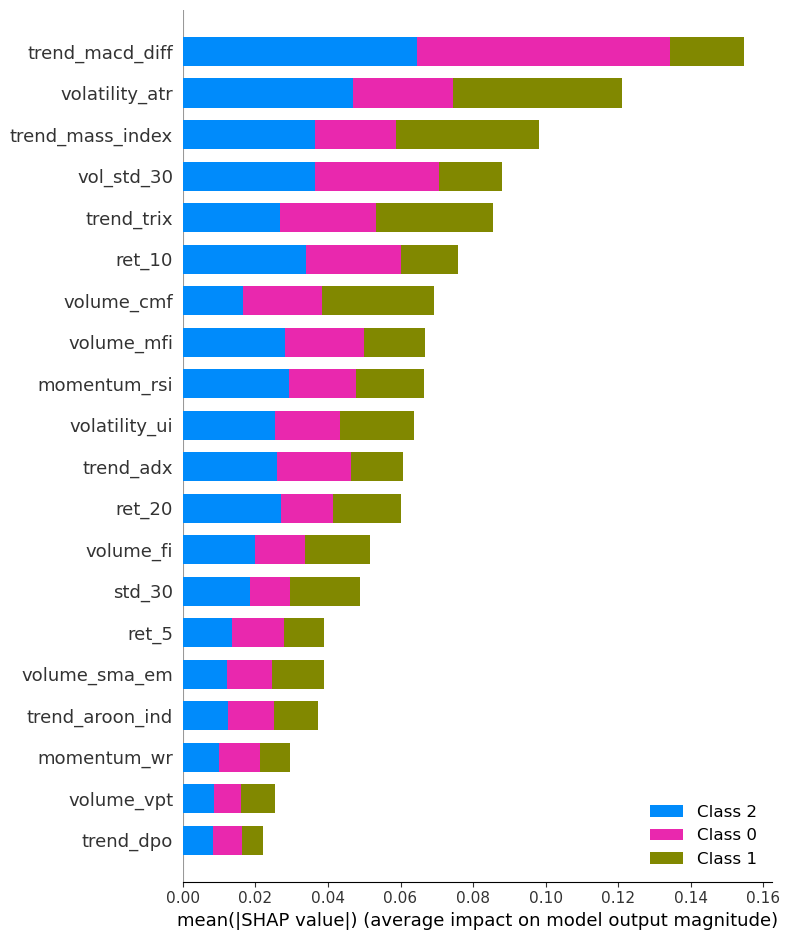

In [30]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# SHAP, Shapley Additive explanations
import shap
explainer = shap.TreeExplainer(rfc)
shap_value = explainer.shap_values(X_sc)

# shap_value, X_sc ÏÇ¨Ïö© shap.summary_plot Í∑∏Î¶¨Í∏∞
shap.summary_plot(shap_value, X_sc)

## __3. ÌîÑÎ°úÏ†ùÌä∏ : Model Traning__  
‚ë† ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞  
‚ë° Purged K-fold for Cross-ValidationÏ†ÅÏö©ÌïòÍ∏∞  
‚ë¢ Model Ï†ÅÏö©ÌïòÍ∏∞

### __‚ë† ÌôòÍ≤ΩÍµ¨ÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞__

In [31]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

sys.path.append('.')
from libs.mlutil.pkfold import PKFold

In [35]:
# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è pickle ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
DATA_PATH = '.'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')

df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

# Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ Î™®Îç∏Ïóê Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†úÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§.
df_data['t_value'].value_counts()

# Îç∞Ïù¥ÌÑ∞ÏÖã ÎπÑÏú® ÎÇòÎàÑÍ∏∞
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# standardzation
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# ÌïôÏäµ ÏãúÍ∞Ñ Îã®Ï∂ïÏùÑ ÏúÑÌï¥ Ïó¨Í∏∞ÏÑ† Ìé∏ÏùòÏÉÅ 1000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
train_x = train_x[:1000] # Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï¶ùÍ∞Ä ÌòπÏùÄ Í∞êÏÜåÏãúÏºú Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï¥Î¥ÖÏãúÎã§.
train_y = train_y[:1000]

### __‚ë° Purged K-fold for Cross-ValidationÏ†ÅÏö©ÌïòÍ∏∞__

In [36]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

n_cv = 5 # ÏïûÏóêÏÑú ÏßÄÏ†ïÌïú Í∞íÏùÄ 4ÏûÖÎãàÎã§. ÏñºÎßàÎ•º ÎÑ£ÏùÑÏßÄ ÏÉùÍ∞ÅÌï¥Î≥¥Í≥† Ïôú Ïù¥ Í∞íÏùÑ ÎÑ£ÏóàÎäîÏßÄÏóê ÎåÄÌï¥ÏÑú ÏÑ§Î™ÖÌï¥Î¥ÖÏãúÎã§.
t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold 
cv = PKFold(n_cv, t1, 0)

### __‚ë¢ Model Ï†ÅÏö©ÌïòÍ∏∞__

In [37]:
# GridsearchCVÏóêÏÑú ÏÇ¨Ïö©Ìï† ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ïÌï©ÎãàÎã§. ÌååÎùºÎØ∏ÌÑ∞Í∞íÏùÑ Î∞îÍøîÎ≥¥ÏÑ∏Ïöî
bc_params = {'n_estimators': [5, 10, 20],
             'max_features': [0.5, 0.7],
             'base_estimator__max_depth': [3,5,10,20],
             'base_estimator__max_features': [None, 'auto'],
             'base_estimator__min_samples_leaf': [3, 5, 10],
             'bootstrap_features': [False, True]
            }

In [38]:
# RandomForest ÏÇ¨Ïö©
rfc = RandomForestClassifier(class_weight='balanced')

In [39]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# Bagging Ï†ÅÏö©
bag_rfc = BaggingClassifier(rfc)

In [40]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# GridSearchCV Ï†ÅÏö©
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv = cv, n_jobs = -1, verbose = 1)

In [42]:
# fit
gs_rfc.fit(train_x, train_y)

# best estimator 
gs_rfc_best = gs_rfc.best_estimator_
gs_rfc_best.fit(train_x, train_y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


BaggingClassifier(bootstrap_features=True,
                  estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=5,
                                                   max_features='auto',
                                                   min_samples_leaf=5),
                  max_features=0.7, n_estimators=5)

In [43]:
# ÏòàÏ∏°Í∞í ÌôïÏù∏
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

In [44]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# test_y, pred_yÎ•º ÌôúÏö©Ìïú ÏßÄÌëú Ï†ÅÏö©
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

# ÏßÄÌëúÎ•º ÌÜµÌïú Í≤∞Í≥º ÌôïÏù∏
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'Ï†ïÌôïÎèÑ:{accuracy}, Ï†ïÎ∞ÄÎèÑ:{precision}, Ïû¨ÌòÑÏú®:{recall}')

================= confusion matrix ====================
[[84 52]
 [13 42]]
Ï†ïÌôïÎèÑ:0.6596858638743456, Ï†ïÎ∞ÄÎèÑ:0.44680851063829785, Ïû¨ÌòÑÏú®:0.7636363636363637


auc:0.6906417112299466


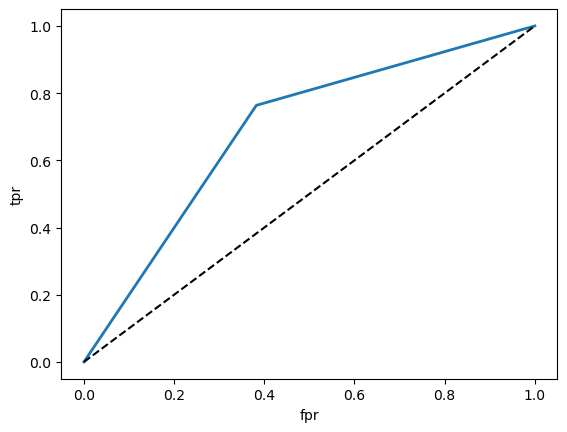

In [45]:
# Q. ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî

# ROC curve ÎßåÎì§Í∏∞
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)

# ROC curve ÏãúÍ∞ÅÌôî
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

## ÌöåÍ≥†  
Ï†úÍ∞Ä...Î≠ò ÌïòÍ≥† ÏûàÎäîÍ±∞Ï£†?